In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("trajectory.csv")
forward_work = df[df['isForward'] == 1]['w']
backward_work = df[df['isForward'] == 0]['w']

In [3]:
plt.rcParams['font.family'] = 'Liberation Sans'

### Plotting the forward and backward work distributions

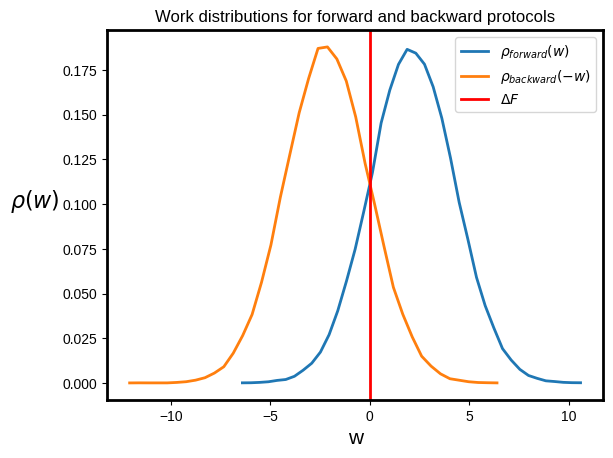

In [4]:

p, be = np.histogram(forward_work, bins = 40, density = True)
coords = (be[1:] + be[:-1])/2

fig, ax = plt.subplots()
ax.plot(coords, p, lw = 2, label = r'$\rho_{forward}(w)$')
p, be = np.histogram(backward_work, bins = 40, density = True)
coords = (be[1:] + be[:-1])/2
ax.set_title('Work distributions for forward and backward protocols')
ax.plot(-coords, p , lw = 2, label = r'$\rho_{backward}(-w)$')
ax.axvline(0, color = 'red',  lw = 2, label = r'$\Delta F$')
ax.legend(loc = 'best')
ax.set_xlabel('w', fontsize = 15)
ax.set_ylabel(r'$\rho(w)$', fontsize = 16, fontweight = "bold", rotation = 0, labelpad = 20)
_ = [ax.spines[i].set_linewidth(2) for i in ax.spines]
plt.savefig("./images/work_distribution_graph.png")

In [5]:
cropped_df = df.drop(columns = ['w', 'isForward'])
trajectory_1 = cropped_df.loc[0].to_numpy()
dt = 10 / (trajectory_1.size - 1)
timesteps = np.arange(0, 10 + dt, dt)
a = 0

## Plotting the forward trajectory

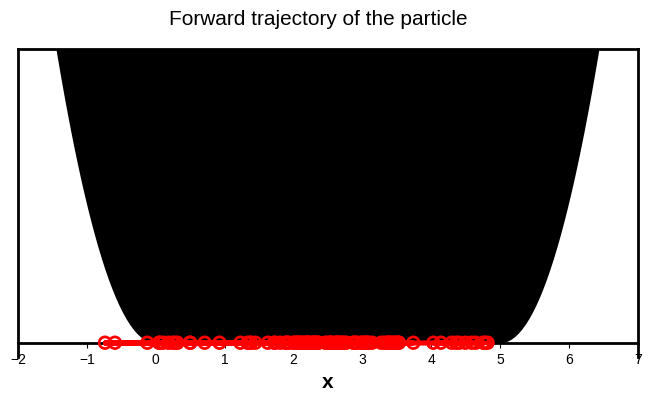

MovieWriter imagemagic unavailable; using Pillow instead.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import ArtistAnimation

images = []

fig, ax = plt.subplots(figsize = (8, 4))
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.get_yaxis().set_visible(False)
numsteps = trajectory_1.shape[0]

# ax.spines['bottom'].set_zorder(1)  # Set zorder for the bottom spine
# ax.xaxis.set_tick_params(zorder=2)  # Set zorder for the x-axis ticks
# ax.xaxis.label.set_zorder(3)  # Set zorder for the x-axis label
plt.suptitle("Forward trajectory of the particle", fontsize = 15)

ax.set_xlim(-2, 7)
ax.set_ylim(-0.1, 2)
ax.set_xlabel("x", fontweight = 'bold', fontsize = 15)
ax.spines['bottom'].set_position(('data',0))
for i in range(numsteps):
    center = i * 0.5 * dt
    k = np.arange(center - 2, center + 2, 0.05)
    parabola = plt.plot(k, 0.01 + (k - center)**2, lw = 3, color = 'black')
    p = plt.plot(trajectory_1[:i], np.zeros_like(trajectory_1[:i]), color = 'red', zorder = 4, lw = 3)    
    point = plt.scatter(trajectory_1[i], 0,facecolors = 'none', lw = 2, s = 70, color = 'red', zorder = 5)
    images.append([point,  parabola[0], p[0]])

_ = [ax.spines[i].set_linewidth(2) for i in ax.spines]
anim = ArtistAnimation(fig, images) 
plt.show()
anim.save(f"./images/anim{a}.gif", writer = 'imagemagic', fps = 60)
a += 1

In [7]:
from IPython.display import Image, display, HTML

HTML(f"<img src=\"./images/anim{a-1}.gif\" />")

## Plotting the backward trajectory

In [8]:
cropped_df = df.drop(columns = ['w', 'isForward'])
trajectory_1 = cropped_df.loc[199997].to_numpy()
dt = 10 / (trajectory_1.size - 1)
timesteps = np.arange(0, 10 + dt, dt)

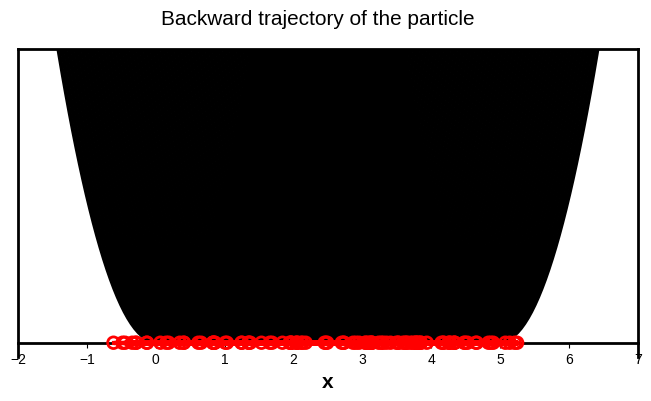

MovieWriter imagemagic unavailable; using Pillow instead.


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import ArtistAnimation

images = []

fig, ax = plt.subplots(figsize = (8, 4))
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.get_yaxis().set_visible(False)
numsteps = trajectory_1.shape[0]

# ax.spines['bottom'].set_zorder(1)  # Set zorder for the bottom spine
# ax.xaxis.set_tick_params(zorder=2)  # Set zorder for the x-axis ticks
# ax.xaxis.label.set_zorder(3)  # Set zorder for the x-axis label
plt.suptitle("Backward trajectory of the particle", fontsize = 15)

ax.set_xlim(-2, 7)
ax.set_ylim(-0.1, 2)
ax.set_xlabel("x", fontweight = 'bold', fontsize = 15)
ax.spines['bottom'].set_position(('data',0))
for i in range(numsteps):
    center = 5 - i * 0.5 * dt
    k = np.arange(center - 2, center + 2, 0.05)
    parabola = plt.plot(k, 0.01 + (k - center)**2, lw = 3, color = 'black')
    p = plt.plot(trajectory_1[:i], np.zeros_like(trajectory_1[:i]), color = 'red', zorder = 4, lw = 3)    
    point = plt.scatter(trajectory_1[i], 0,facecolors = 'none', lw = 2, s = 70, color = 'red', zorder = 5)
    images.append([point,  parabola[0], p[0]])

_ = [ax.spines[i].set_linewidth(2) for i in ax.spines]
anim = ArtistAnimation(fig, images) 
plt.show()
anim.save(f"images/anim{a}.gif", writer = 'imagemagic', fps = 60)
a += 1

In [10]:
from IPython.display import Image, display, HTML

HTML(f"<img src=\"./images/anim1.gif\" />")